<a href="https://colab.research.google.com/github/adithi20/SElab/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google_trans_new

In [2]:
pip install pyttsx3

In [3]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15717 sha256=a7730c77f202e82e0b87d370cd198b429a1bc6337a9a5cf8c54019f156a687c3
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

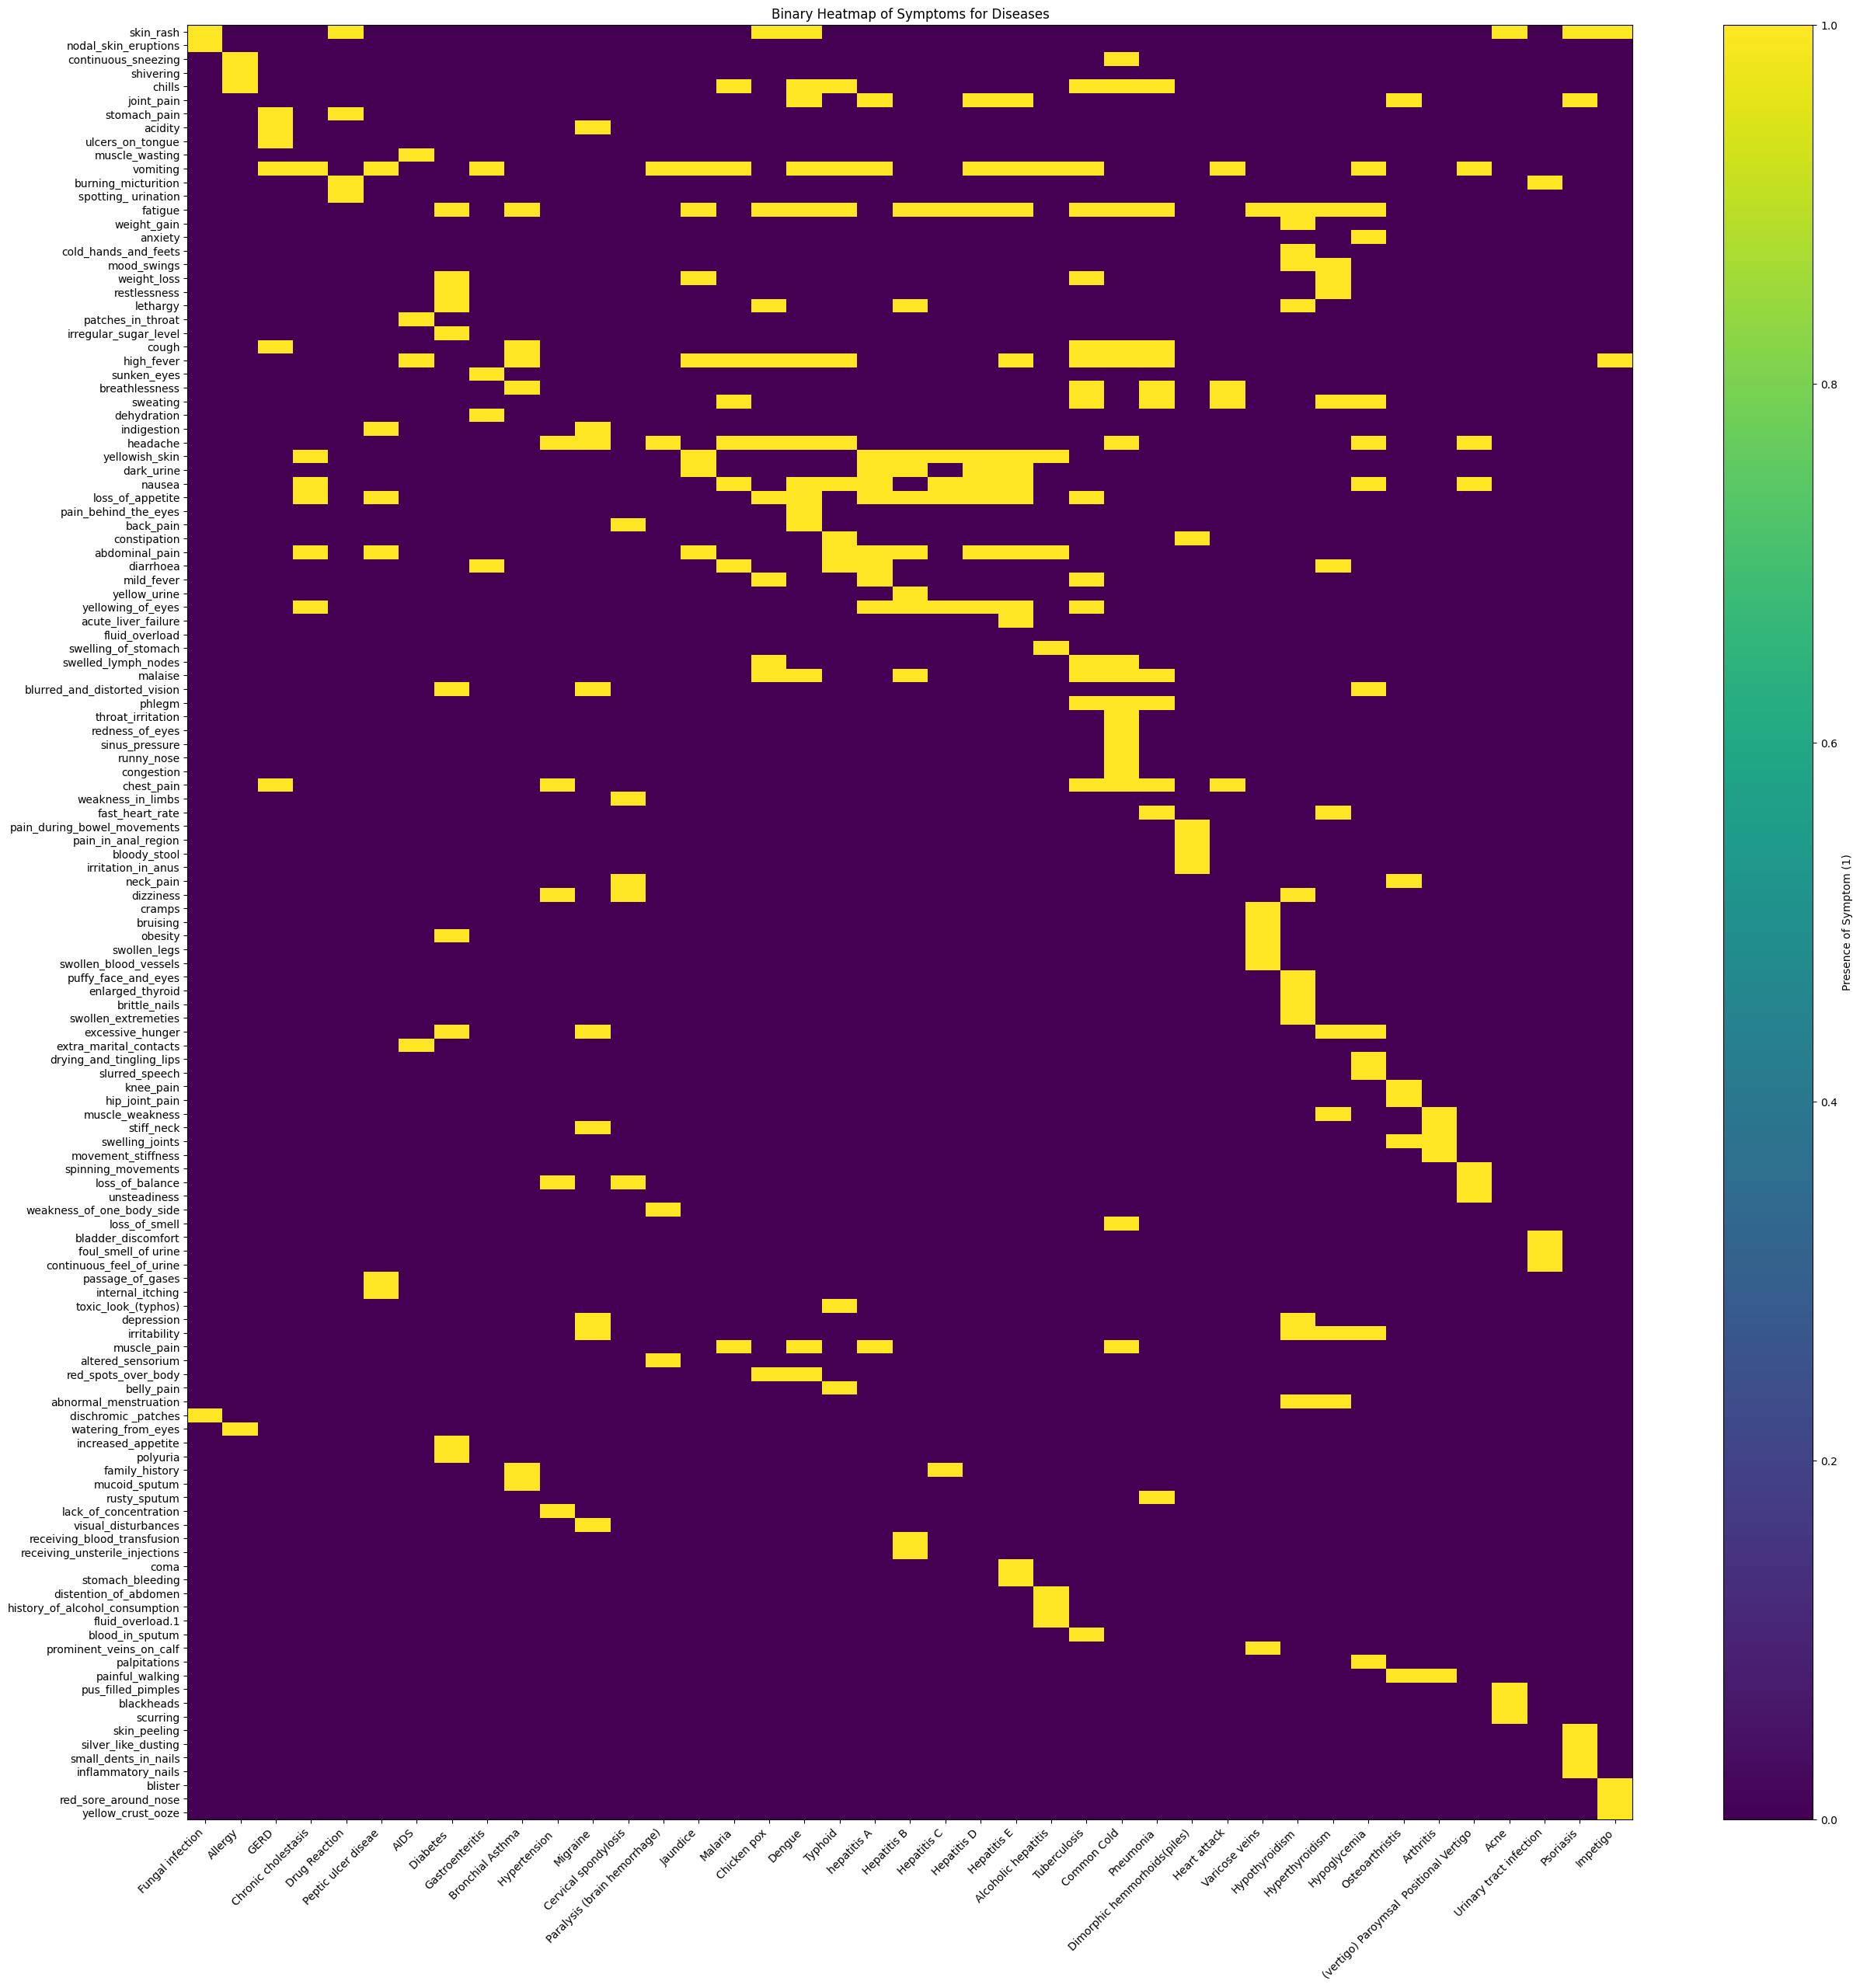

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from CSV
file_path = '/content/Testing.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Plotting a binary heatmap
plt.figure(figsize=(30 , 30))
plt.imshow(df.iloc[:, 1:-1].T, cmap='viridis', aspect='auto', interpolation='none')  # Assuming the first column is an index
plt.yticks(range(len(df.columns[1:-1])), df.columns[1:-1])
plt.xticks(range(len(df)), df['prognosis'], rotation=45, ha='right')
plt.colorbar(label='Presence of Symptom (1)')
plt.title('Binary Heatmap of Symptoms for Diseases')
plt.show()

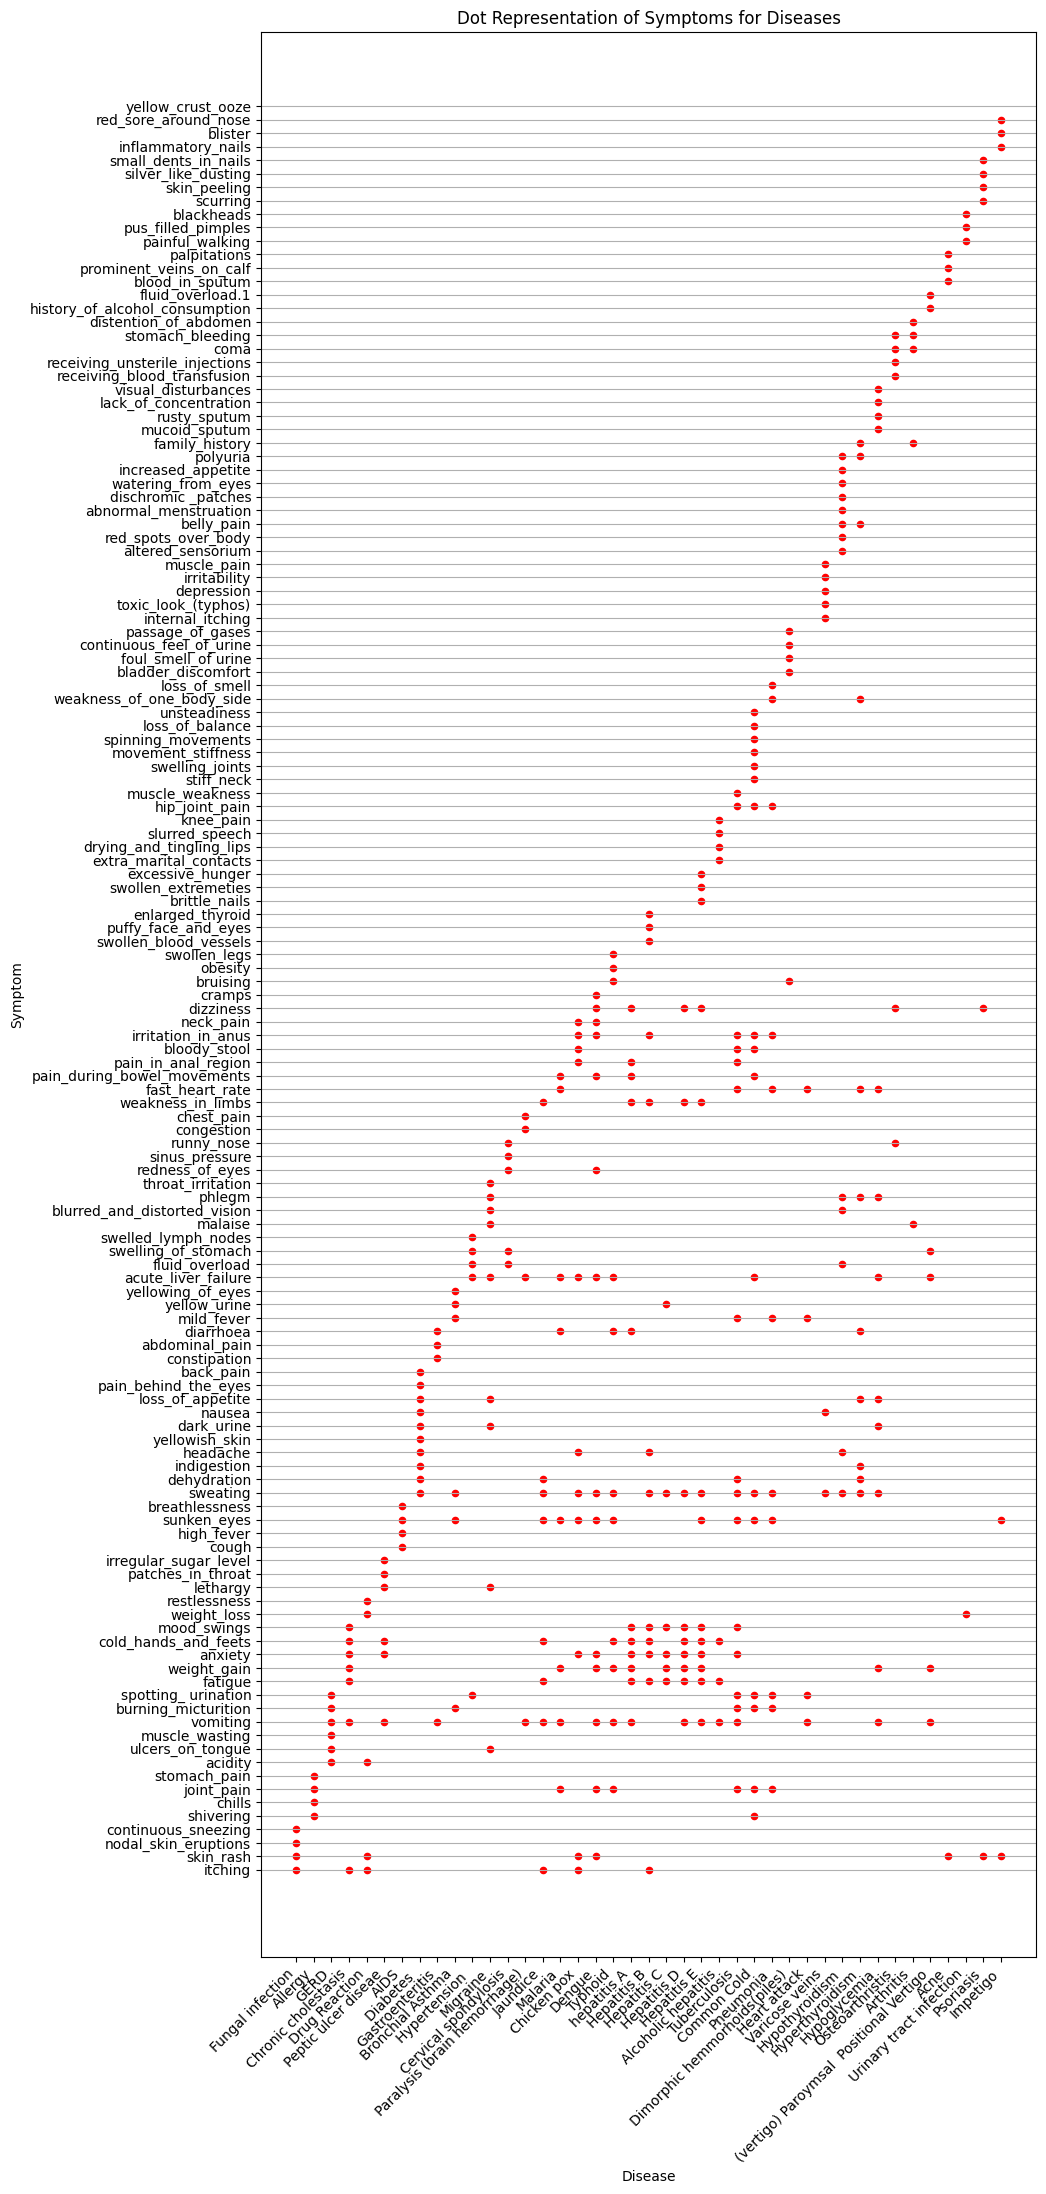

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from CSV
file_path = '/content/Testing.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(10, 25))
for index, row in df.iterrows():
    symptomatic_columns = row.iloc[:-1][row.iloc[:-1] == 1].index
    plt.scatter([index] * len(symptomatic_columns), symptomatic_columns, color='red', marker='o', s=20)  # Adjust size (s) as needed

plt.yticks(range(len(df.columns[:-1])), df.columns[:-1])
plt.xticks(range(len(df)), df['prognosis'], rotation=45, ha='right')
plt.title('Dot Representation of Symptoms for Diseases')
plt.xlabel('Disease')
plt.ylabel('Symptom')
plt.grid(axis='y')
plt.show()


# New Section

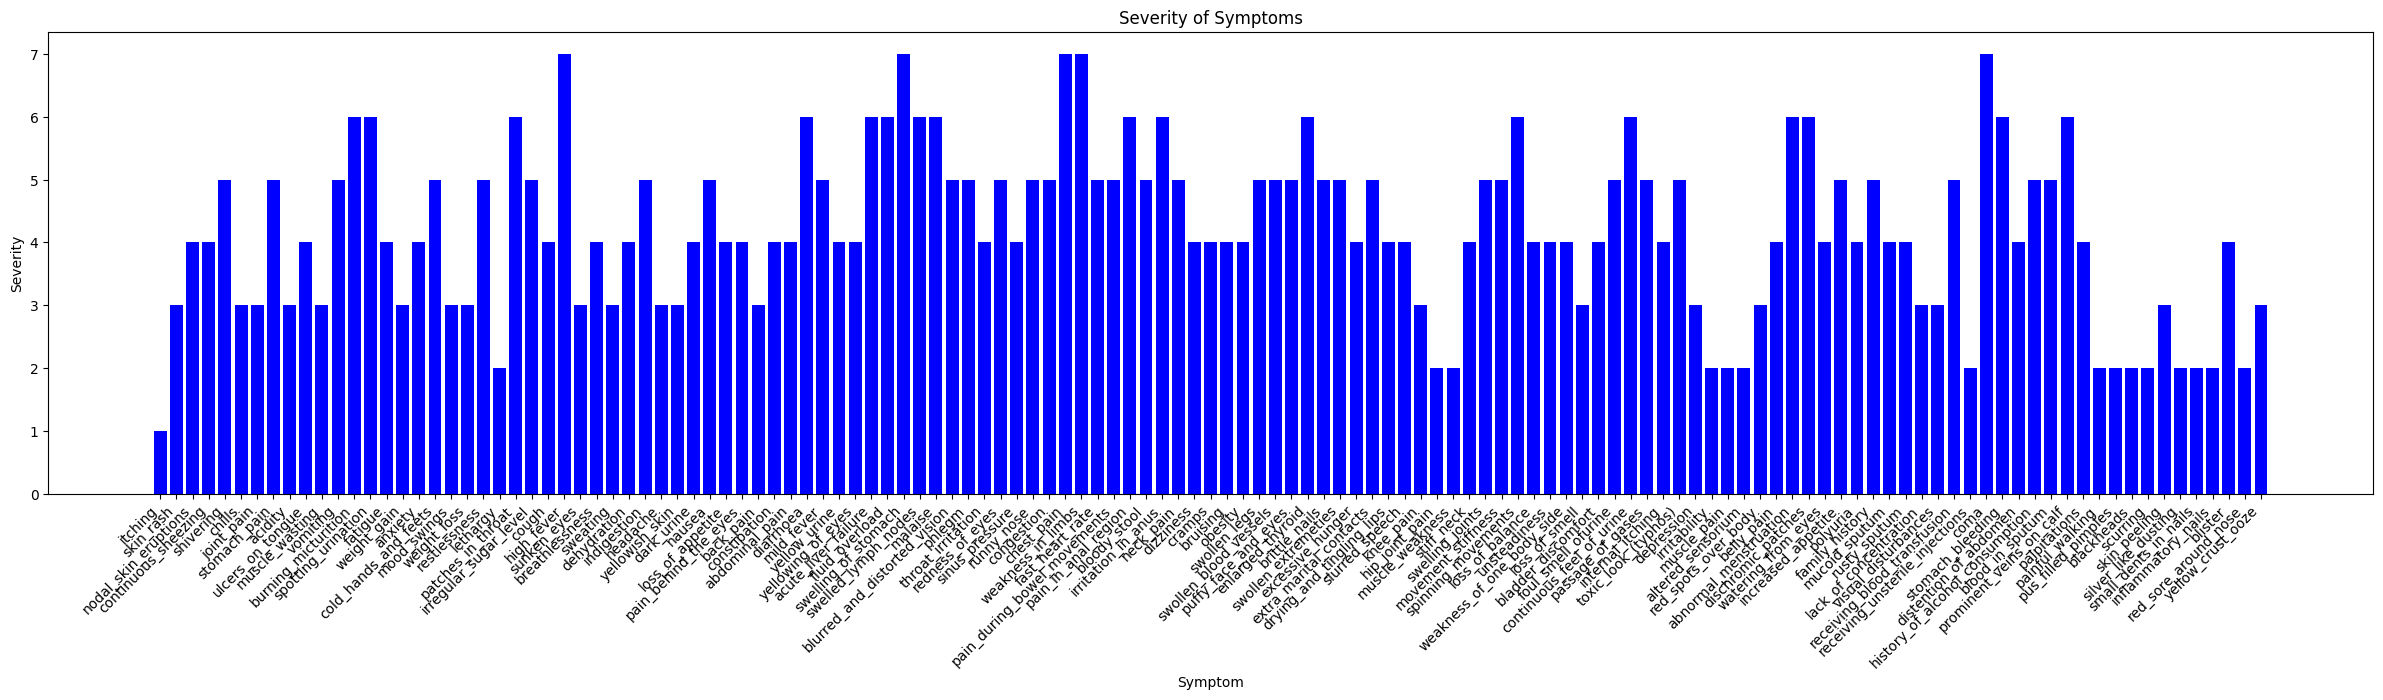

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV without specifying column names
file_path = '/content/Symptom_severity.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path, header=None)

# Create a bar graph
plt.figure(figsize=(30, 6))
plt.bar(df.iloc[:, 0], df.iloc[:, 1], color='blue')
plt.title('Severity of Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Severity')
plt.xticks(rotation=45, ha='right')
plt.show()


In [10]:
from googletrans import Translator

import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


training = pd.read_csv('/content/Training.csv')
testing= pd.read_csv('/content/Testing.csv')
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y

#dimensionality_reduction = training.groupby(training_dataset['prognosis']).max()

reduced_data = training.groupby(training['prognosis']).max()

#mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']
testy    = le.transform(testy)


clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
# print(clf.score(x_train,y_train))
# print ("cross result========")
scores = cross_val_score(clf, x_test, y_test, cv=3)
# print (scores)
print (scores.mean())


model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
print(model.score(x_test,y_test))

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()


severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

symptoms_dict = {}

for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


def getDescription():
    global description_list
    with open('/content/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)




def getSeverityDict():
    global severityDictionary
    with open('/content/Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass


def getprecautionDict():
    global precautionDictionary
    with open('/content/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


def getInfo():
    # name=input("Name:")
    print("Your Name \n\t\t\t\t\t\t",end="->")
    name=input("")
    print("hello ",name)

def check_pattern(dis_list,inp):
    import re
    pred_list=[]
    ptr=0
    patt = "^" + inp + "$"
    regexp = re.compile(inp)
    for item in dis_list:

        # print(f"comparing {inp} to {item}")
        if regexp.search(item):
            pred_list.append(item)
            # return 1,item
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return ptr,item
def sec_predict(symptoms_exp):
    df = pd.read_csv('/content/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {}

    for index, symptom in enumerate(X):
        symptoms_dict[symptom] = index

    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1


    return rf_clf.predict([input_vector])


def print_disease(node):
    #print(node)
    node = node[0]
    #print(len(node))
    val  = node.nonzero()
    # print(val)
    disease = le.inverse_transform(val[0])
    return disease
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    # print(tree_)
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []


    # conf_inp=int()
    while True:

        print("Enter the symptom you are experiencing  \n\t\t\t\t\t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter number of days.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])

                print(description_list[present_disease[0]])

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])
                translator = Translator()
                print(translator.translate((description_list[present_disease[0]])))

            print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))
            row = doctors[doctors['disease'] == present_disease[0]]
            print('Consult ', str(row['name'].values))
            print()
            print('Visit ', str(row['link'].values))


    recurse(0, 1)
doc_dataset = pd.read_csv('/content/doctors_dataset.csv', names = ['Name', 'Description'])


diseases = reduced_data.index
diseases = pd.DataFrame(diseases)

doctors = pd.DataFrame()
doctors['name'] = np.nan
doctors['link'] = np.nan
doctors['disease'] = np.nan

doctors['disease'] = diseases['prognosis']


doctors['name'] = doc_dataset['Name']
doctors['link'] = doc_dataset['Description']

record = doctors[doctors['disease'] == 'AIDS']
record['name']
record['link']




# Execute the bot and see it in Action
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)

0.9747551911748323
for svm: 
1.0
Your Name 
						->N. Adithi Rao
hello  N. Adithi Rao
Enter the symptom you are experiencing  
						->headache
searches related to input: 
0 ) headache
Okay. From how many days ? : 28
Are you experiencing any 
muscle_weakness ? : yes
stiff_neck ? : yes
swelling_joints ? : yes
movement_stiffness ? : yes
painful_walking ? : yes
You should take the consultation from doctor. 
You may have  Arthritis
Arthritis is the swelling and tenderness of one or more of your joints. The main symptoms of arthritis are joint pain and stiffness, which typically worsen with age. The most common types of arthritis are osteoarthritis and rheumatoid arthritis.
Arthritis is the swelling and tenderness of one or more of your joints. The main symptoms of arthritis are joint pain and stiffness, which typically worsen with age. The most common types of arthritis are osteoarthritis and rheumatoid arthritis.
Take following measures : 
1 ) exercise
2 ) use hot and cold therapy
3 ) tr

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.9738562091503268, 0.9912280701754386, 'x[54] <= 0.5\ngini = 0.976\nsamples = 3296\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 86, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 89, 74, 87\n80, 79, 79, 80, 76]'),
 Text(0.9607843137254902, 0.9736842105263158, 'x[93] <= 0.5\ngini = 0.975\nsamples = 3210\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 89, 74, 87\n80, 79, 79, 80, 76]'),
 Text(0.9477124183006536, 0.956140350877193, 'x[79] <= 0.5\ngini = 0.974\nsamples = 3124\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 3, 74, 87\n80, 79, 79, 80, 76]'),
 Text(0.934640522875817, 0.9385964912280702, 'x[105] <= 0.5\ngini = 0.974\nsamples = 3038\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 

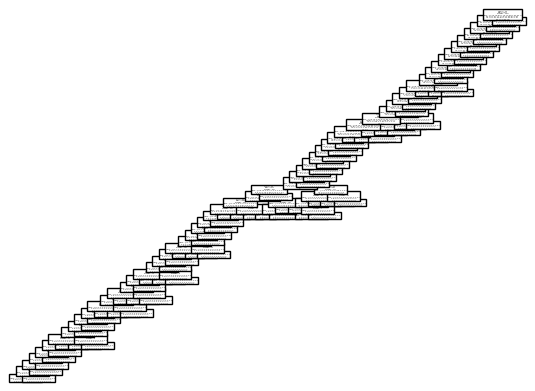

In [11]:
from sklearn import tree

tree.plot_tree(clf)

In [12]:
pip install graphviz

In [13]:
import graphviz
dot_data = tree.export_graphviz(clf)
graph = graphviz.Source(dot_data)
graph.render("chatbot")

'chatbot.pdf'

In [16]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Training Dataset Columns: Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
Doctor Dataset Columns: Index(['Dr. Amarpreet Singh Riar', 'https://www.practo.com/delhi/doctor/amarpreet-singh-riar-general-physician?specialization=General%20Physician&practice_id=1026302'], dtype='object')


<ipython-input-17-8f8b12764f6b>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


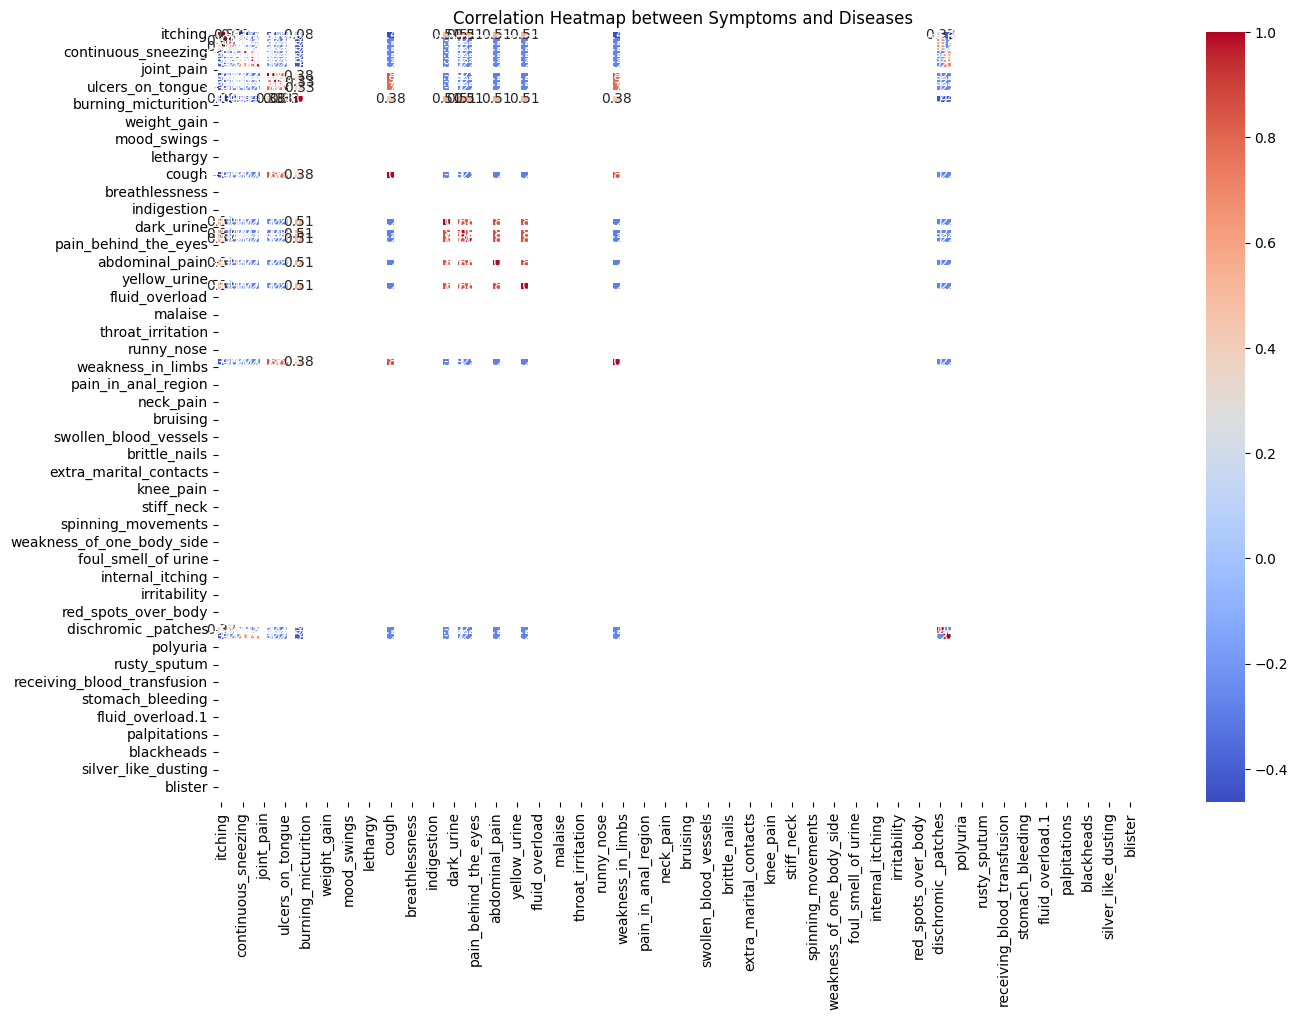

In [17]:
# Display column names in both datasets
print("Training Dataset Columns:", training_data.columns)
print("Doctor Dataset Columns:", doctor_dataset.columns)

# Merge datasets on index
merged_data = pd.merge(training_data, doctor_dataset, left_index=True, right_index=True)

# Visualize the relationship between symptoms and diseases
plt.figure(figsize=(15, 10))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Symptoms and Diseases')
plt.show()


<ipython-input-20-52993a1c29a3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data[[focus_feature] + list(merged_data.columns.difference([focus_feature]))].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


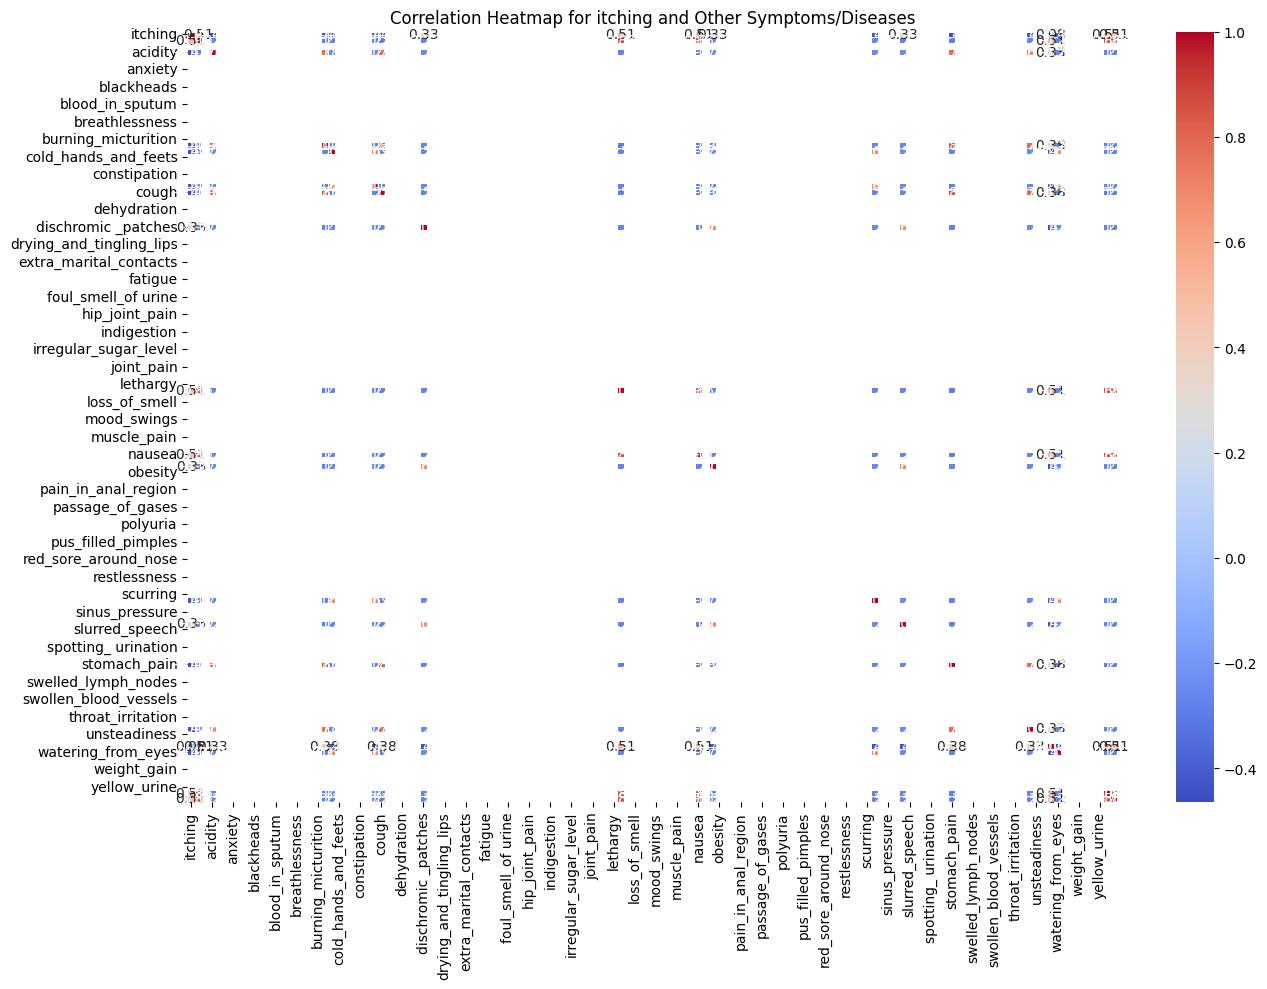

In [20]:
# Choose a specific symptom or disease to focus on
focus_feature = 'itching'

# Visualize the relationship between the selected feature and other symptoms/diseases
plt.figure(figsize=(15, 10))
sns.heatmap(merged_data[[focus_feature] + list(merged_data.columns.difference([focus_feature]))].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Heatmap for {focus_feature} and Other Symptoms/Diseases')
plt.show()



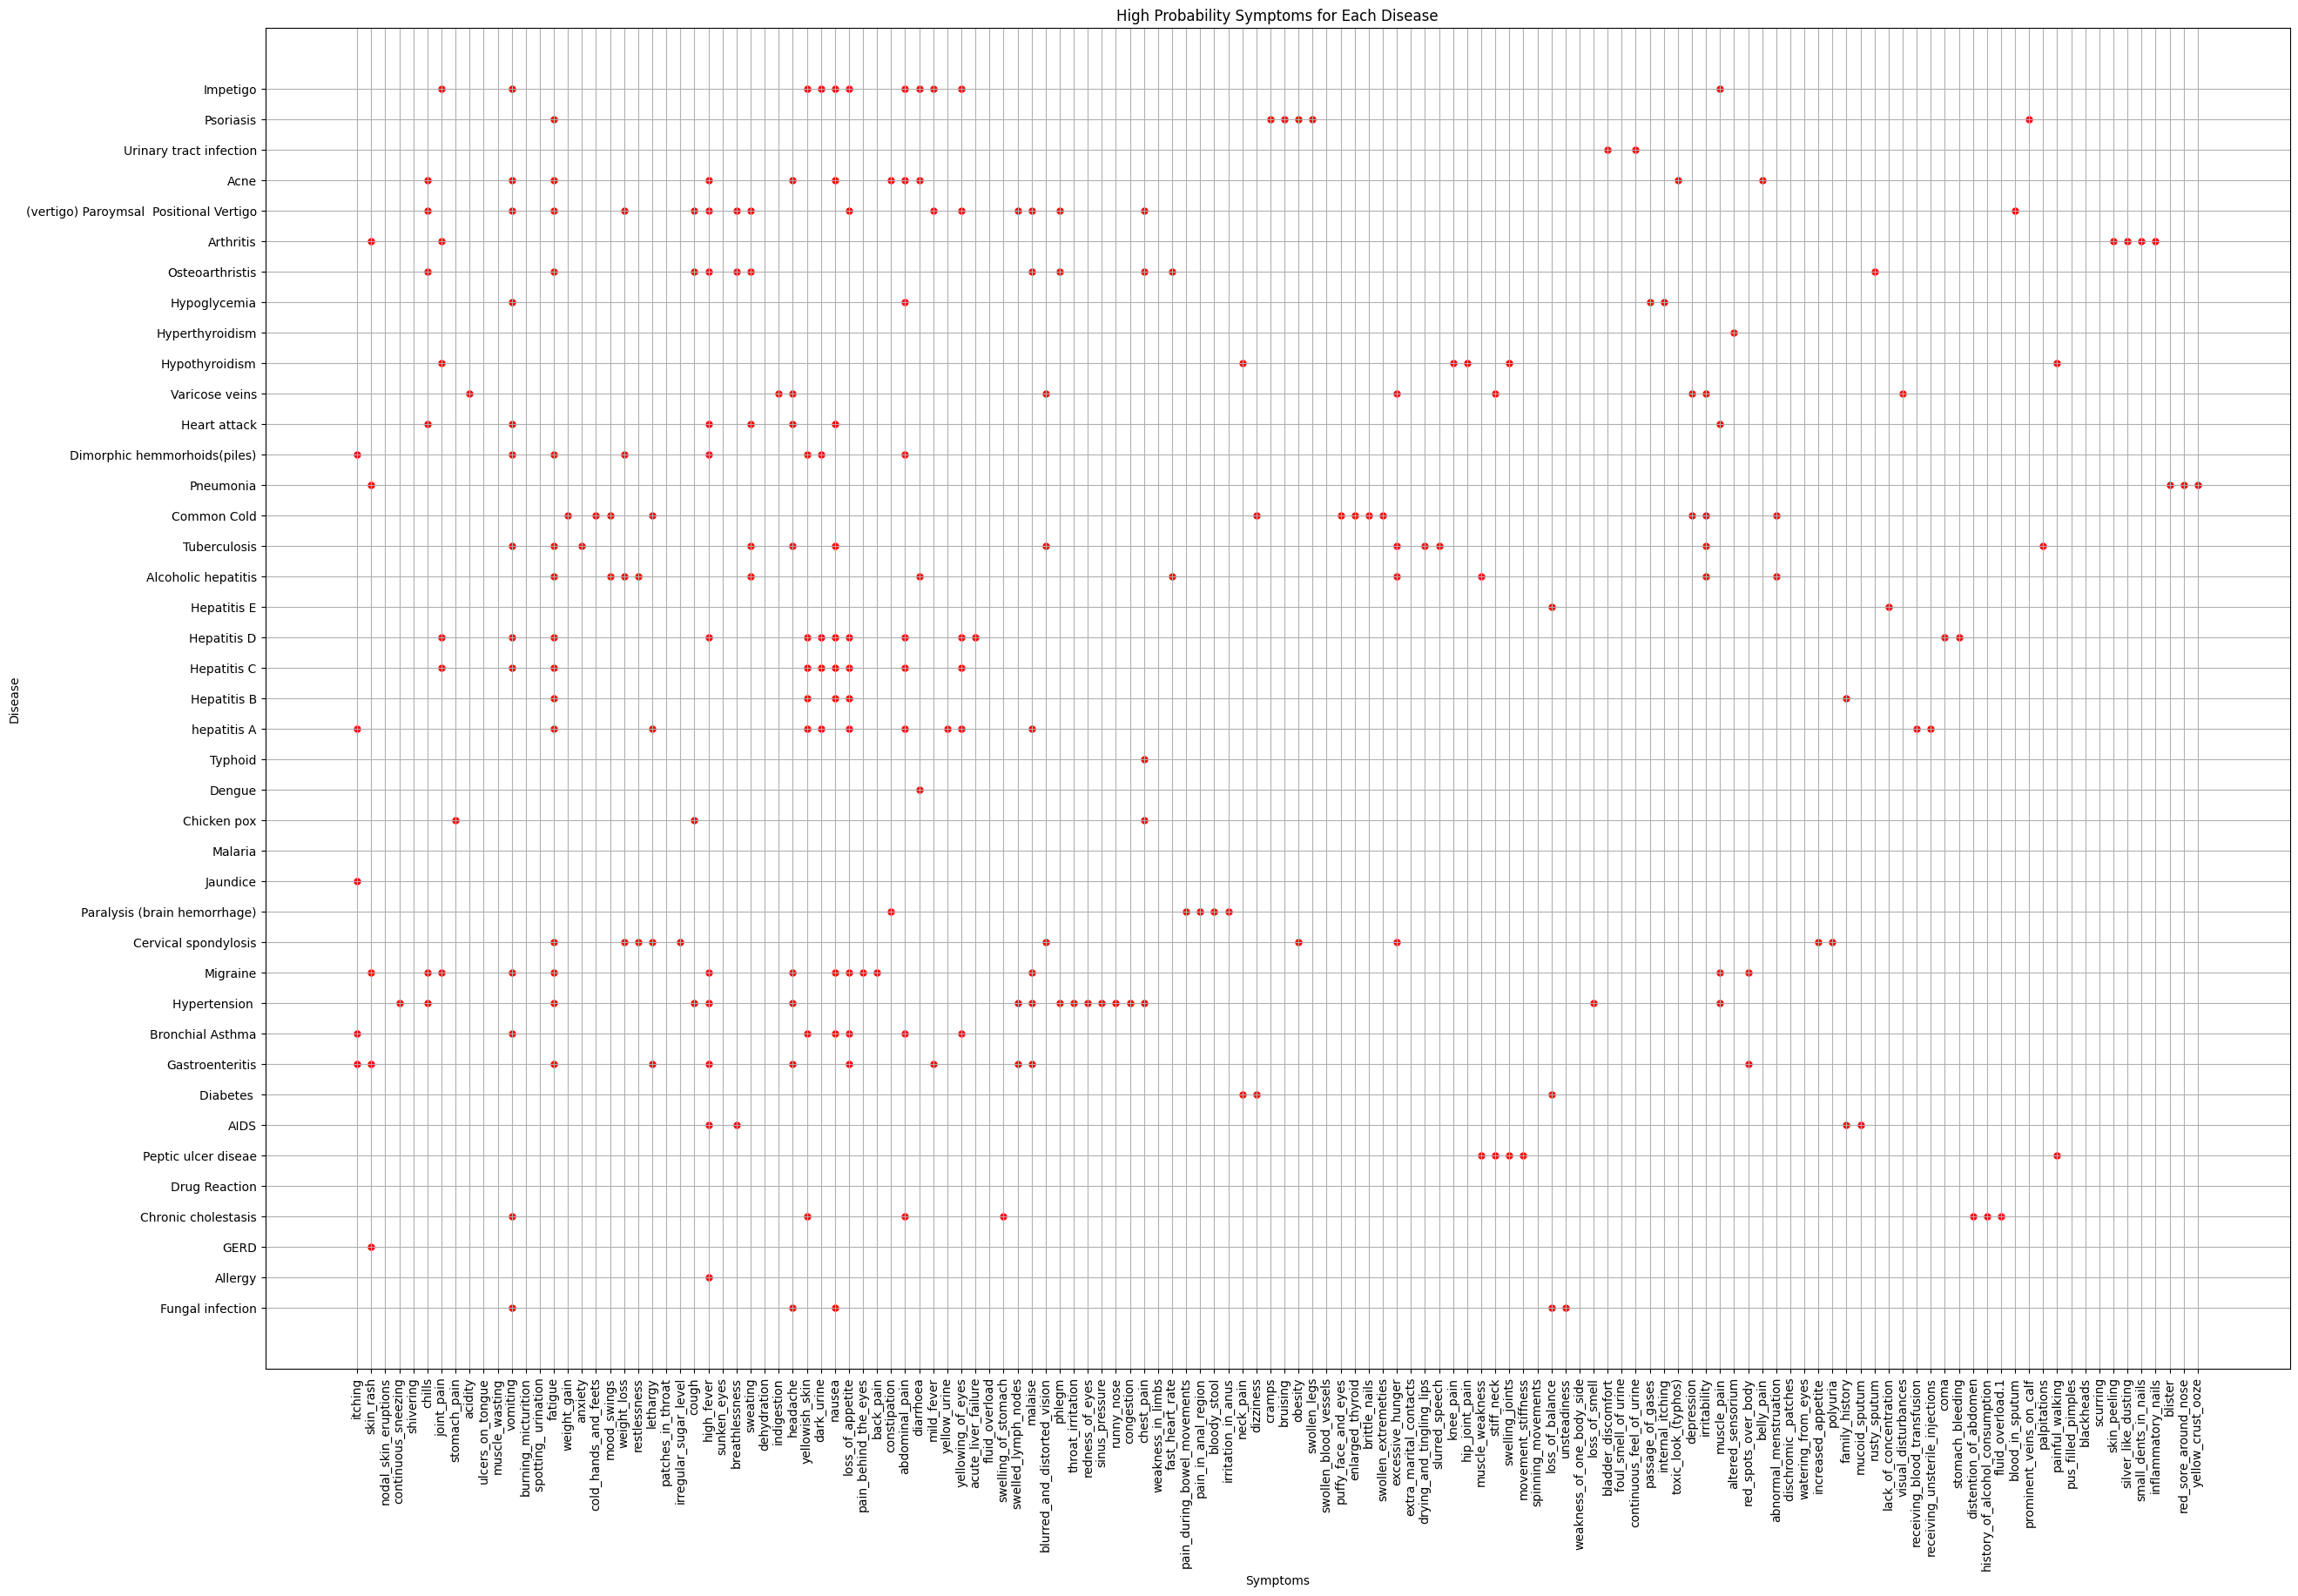

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Find the indices where the probability is above the threshold
high_prob_indices = (symptom_probabilities > threshold).values

# Get the coordinates of the high probability points
x, y = high_prob_indices.nonzero()

# Set up the plot with smaller dots
plt.figure(figsize=(30, 20))
plt.scatter(y, x, marker='o', color='red', s=25)  # Smaller dots
plt.yticks(range(len(disease.unique())), disease.unique())
plt.xticks(range(len(symptoms.columns)), symptoms.columns , rotation = 90)
plt.title('High Probability Symptoms for Each Disease')
plt.xlabel('Symptoms')
plt.ylabel('Disease')
plt.grid(True)
plt.show()

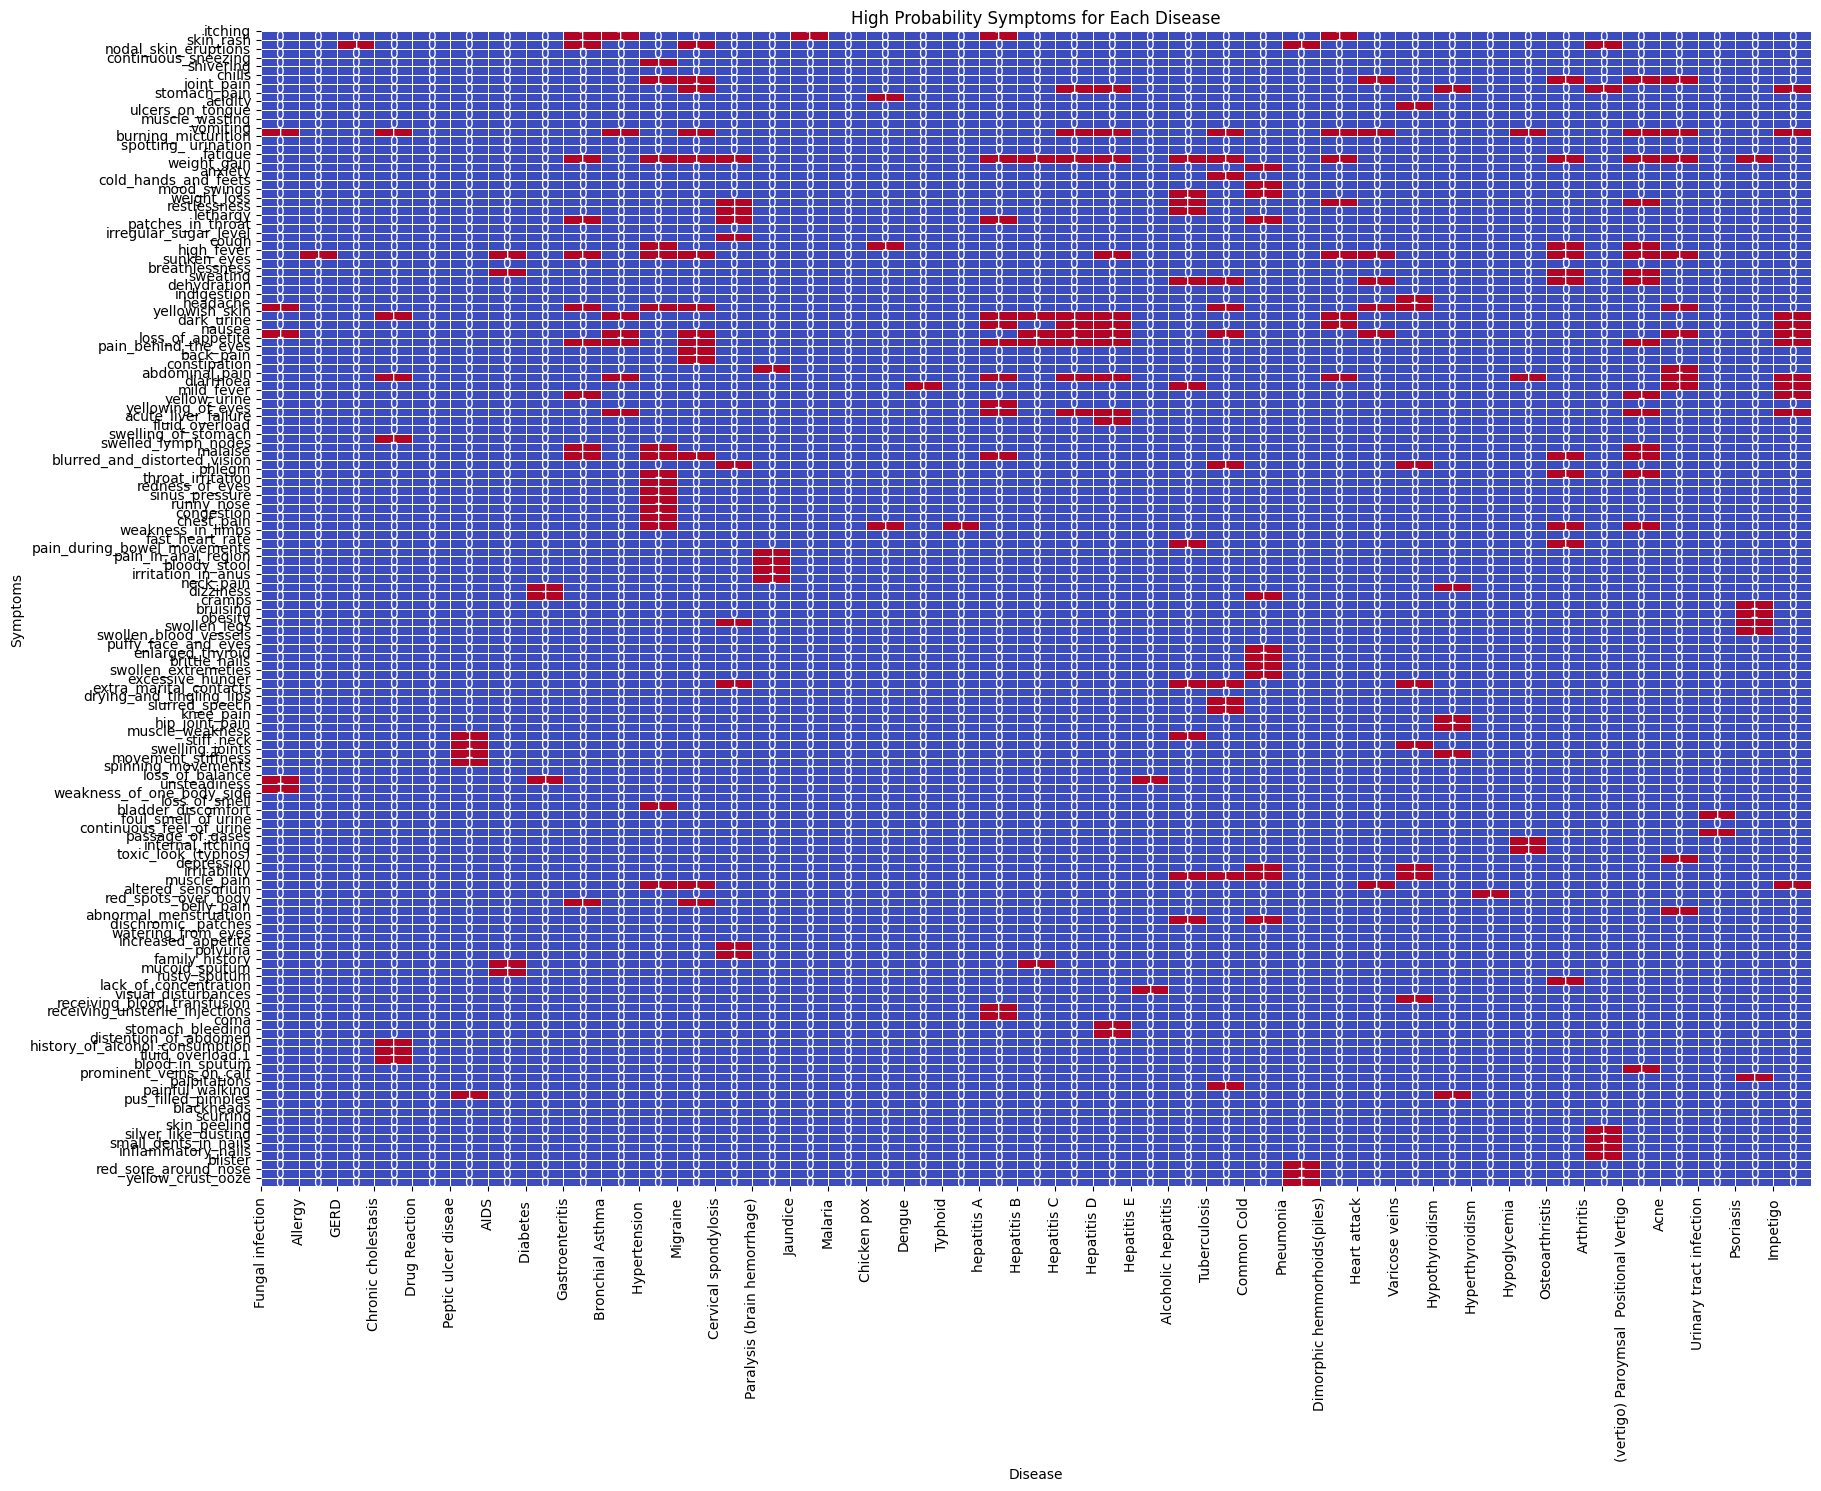

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(symptom_probabilities.T > threshold, cmap='coolwarm', cbar=False, linewidths=0.5, annot=True)
plt.yticks(range(len(symptoms.columns)), symptoms.columns, rotation=0)
plt.xticks(range(len(disease.unique())), disease.unique(), rotation=90)
plt.title('High Probability Symptoms for Each Disease')
plt.xlabel('Disease')
plt.ylabel('Symptoms')
plt.show()


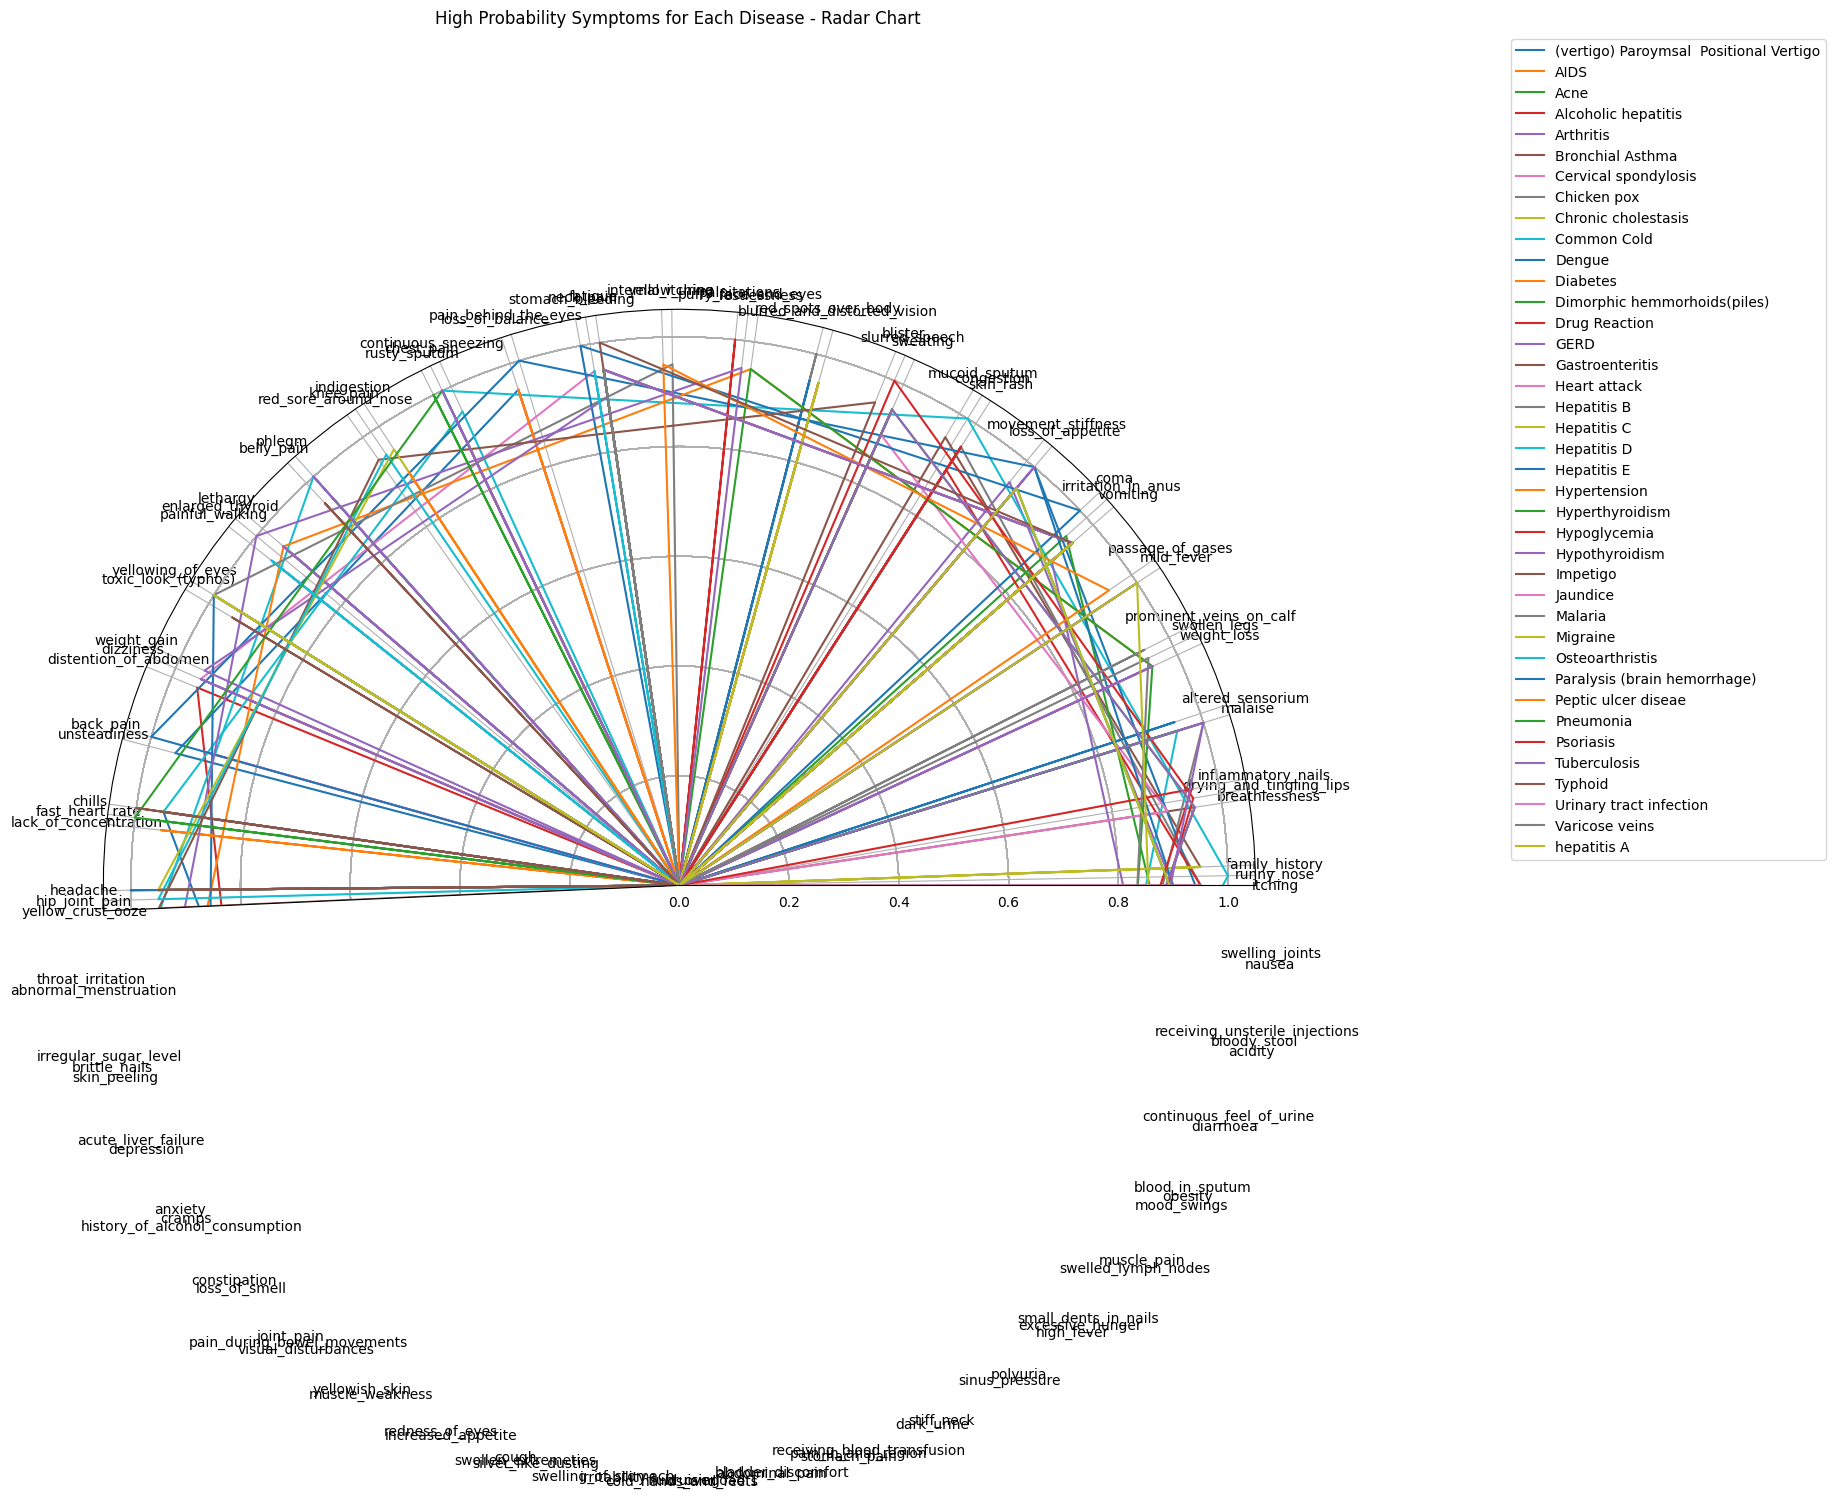

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Create a radar chart for each disease
plt.figure(figsize=(40, 15))

for idx, row in symptom_probabilities.iterrows():
    if row[high_prob_symptoms].max() > threshold:
        plt.polar(range(len(high_prob_symptoms) + 1), list(row[high_prob_symptoms]) + [row[high_prob_symptoms].iloc[0]], label=idx)

# Add labels and legend
plt.xticks(range(len(high_prob_symptoms)), high_prob_symptoms)
plt.title('High Probability Symptoms for Each Disease - Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()


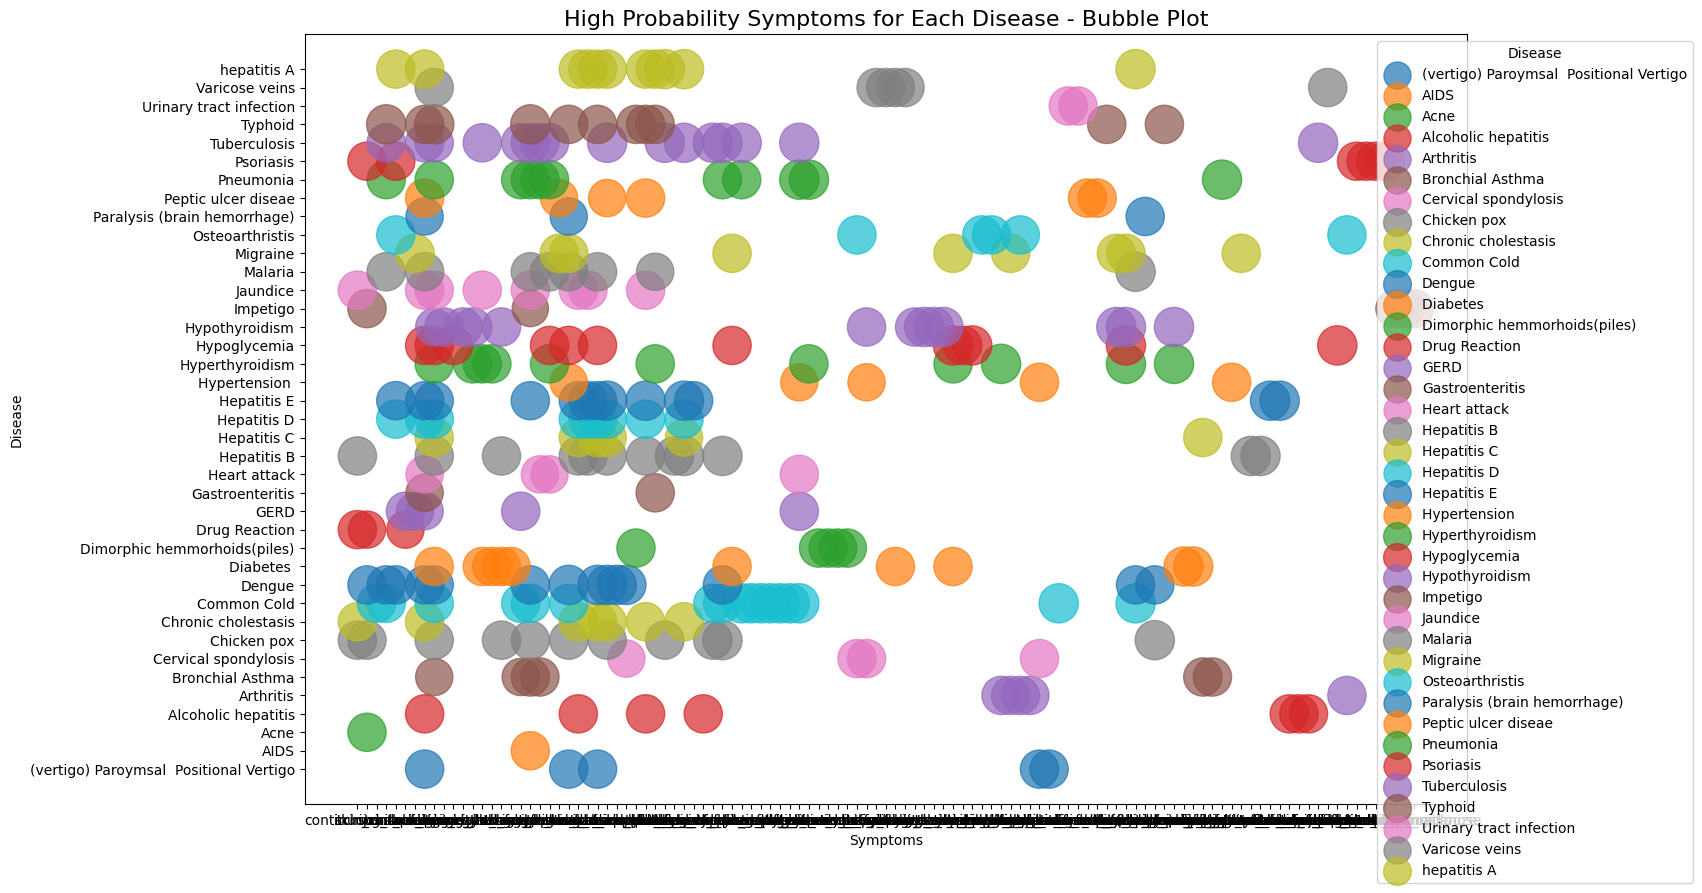

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Create a bubble plot for each disease
plt.figure(figsize=(15, 10))

for idx, (name, row) in enumerate(symptom_probabilities.iterrows()):
    if row[high_prob_symptoms].max() > threshold:
        plt.scatter(high_prob_symptoms, [name] * len(high_prob_symptoms),
                    s=row[high_prob_symptoms] * 800, alpha=0.7, label=name)

# Add labels and legend
plt.title('High Probability Symptoms for Each Disease - Bubble Plot', size=16)
plt.xlabel('Symptoms')
plt.ylabel('Disease')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Disease')

plt.show()


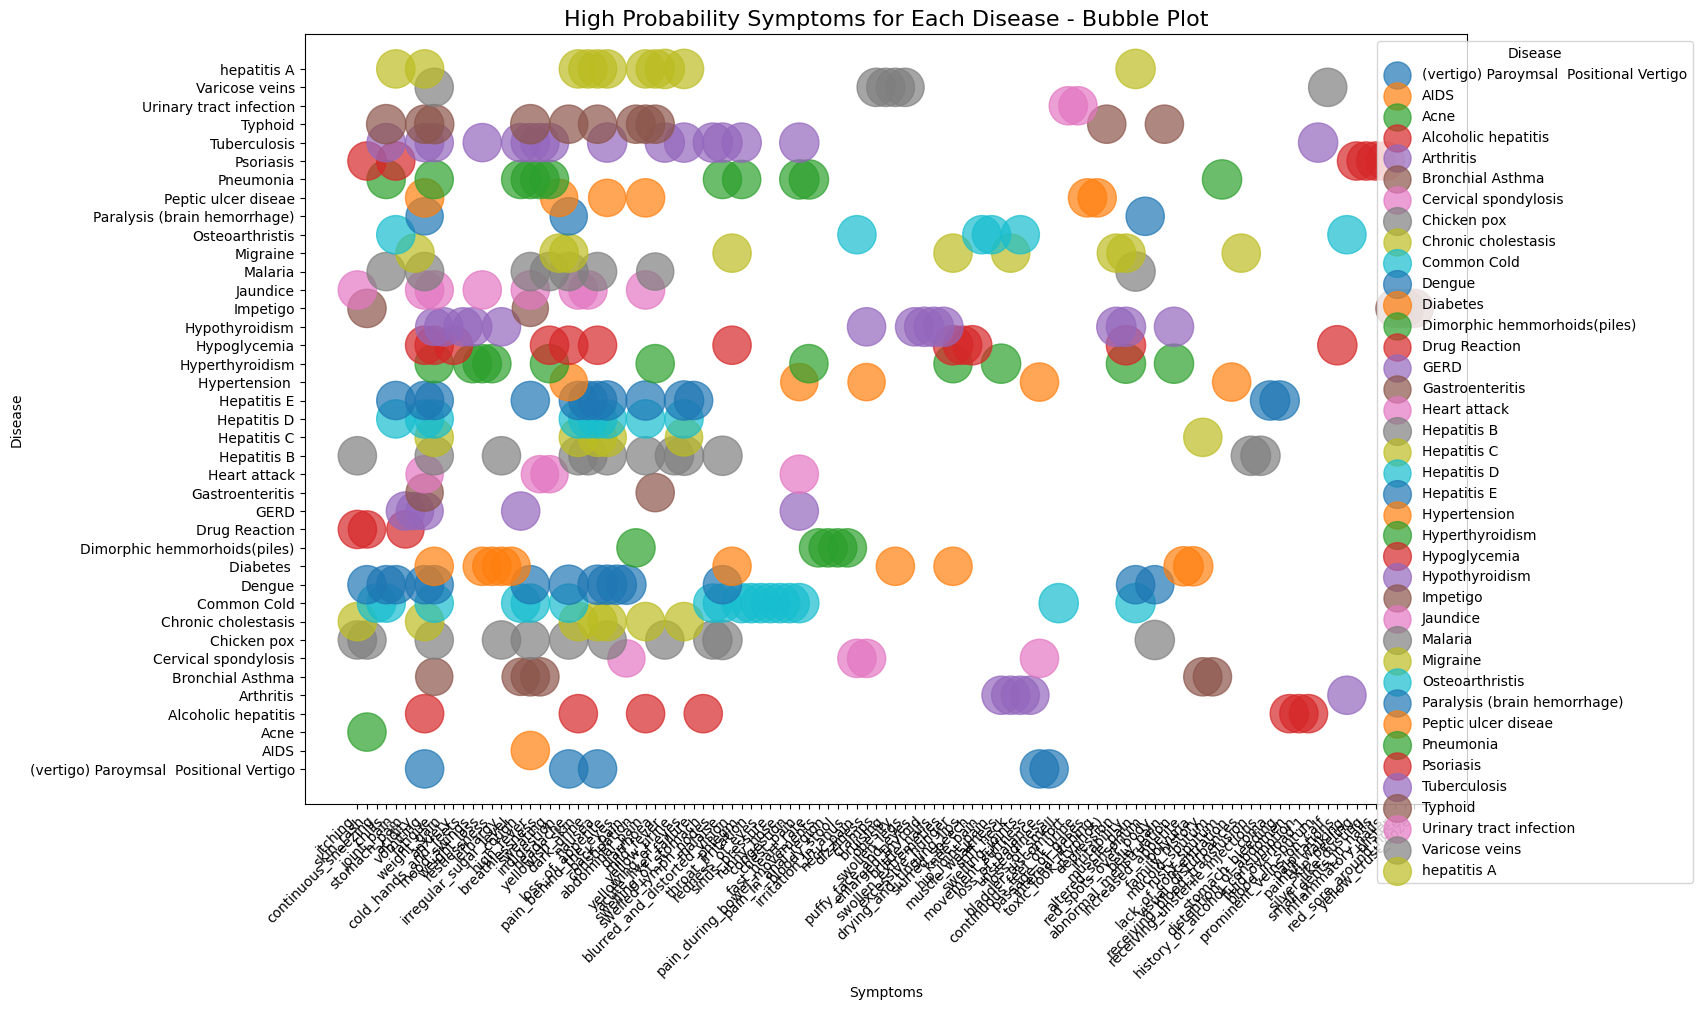

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Create a bubble plot for each disease
plt.figure(figsize=(15, 10))

for idx, (name, row) in enumerate(symptom_probabilities.iterrows()):
    if row[high_prob_symptoms].max() > threshold:
        plt.scatter(high_prob_symptoms, [name] * len(high_prob_symptoms),
                    s=row[high_prob_symptoms] * 800, alpha=0.7, label=name)

# Add labels and legend
plt.title('High Probability Symptoms for Each Disease - Bubble Plot', size=16)
plt.xlabel('Symptoms')
plt.ylabel('Disease')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Disease')

plt.show()


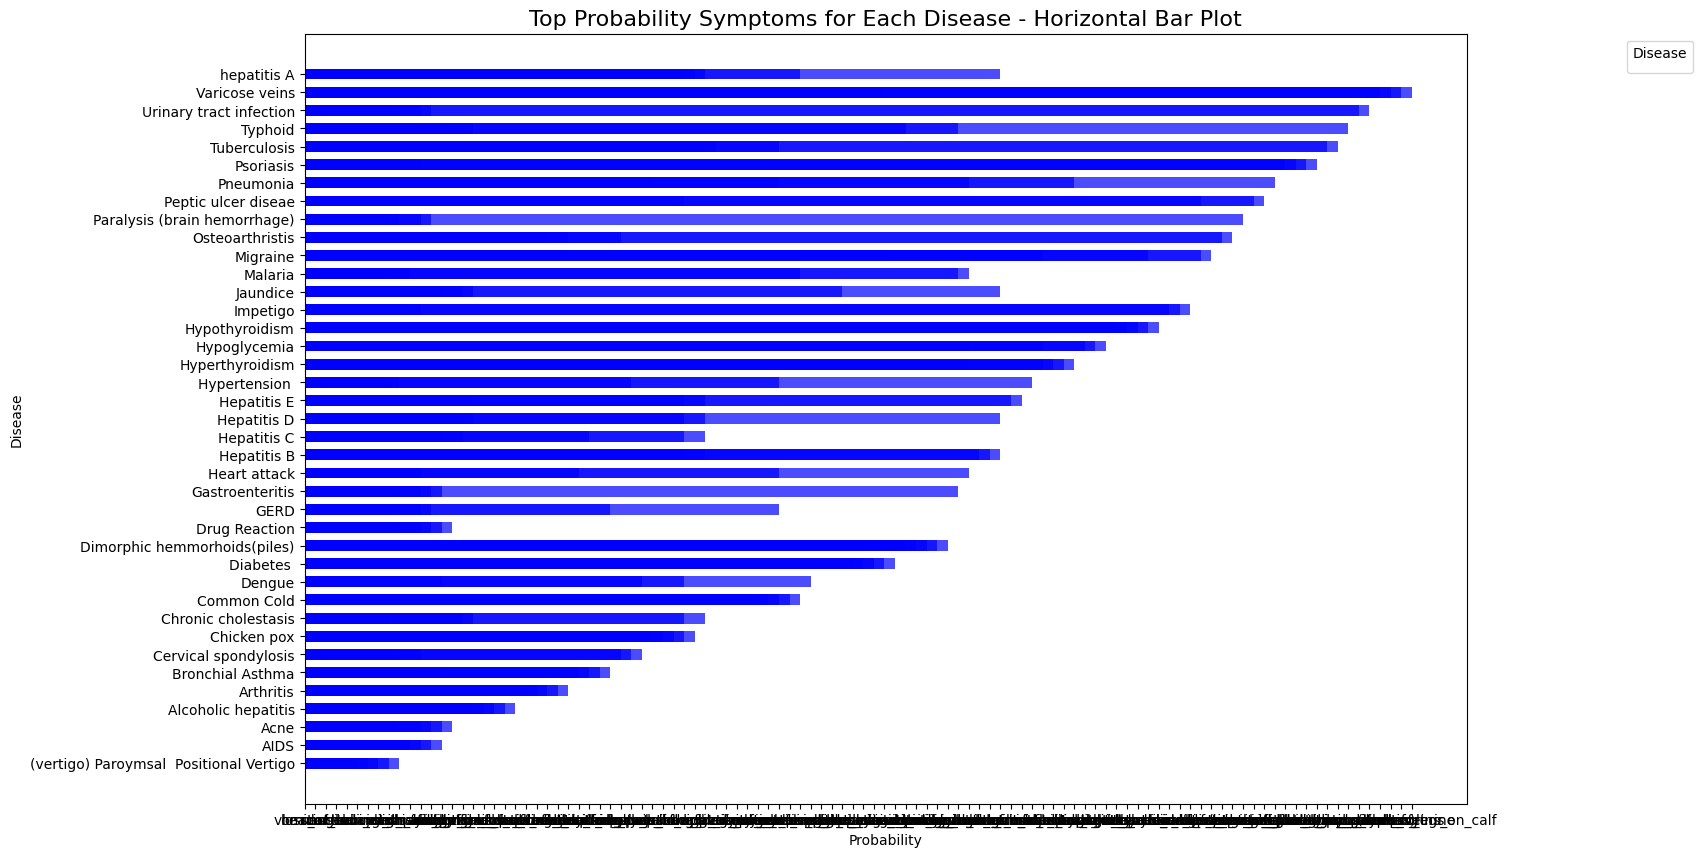

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Create a horizontal bar plot for each disease
plt.figure(figsize=(15, 10))

for idx, (name, row) in enumerate(symptom_probabilities.iterrows()):
    if row[high_prob_symptoms].max() > threshold:
        top_symptoms = row[high_prob_symptoms].nlargest(10)  # Display top 10 symptoms
        plt.barh([name] * len(top_symptoms), top_symptoms.index, color='blue', alpha=0.7, height=0.6)

# Add labels and legend
plt.title('Top Probability Symptoms for Each Disease - Horizontal Bar Plot', size=16)
plt.xlabel('Probability')
plt.ylabel('Disease')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Disease')

plt.show()


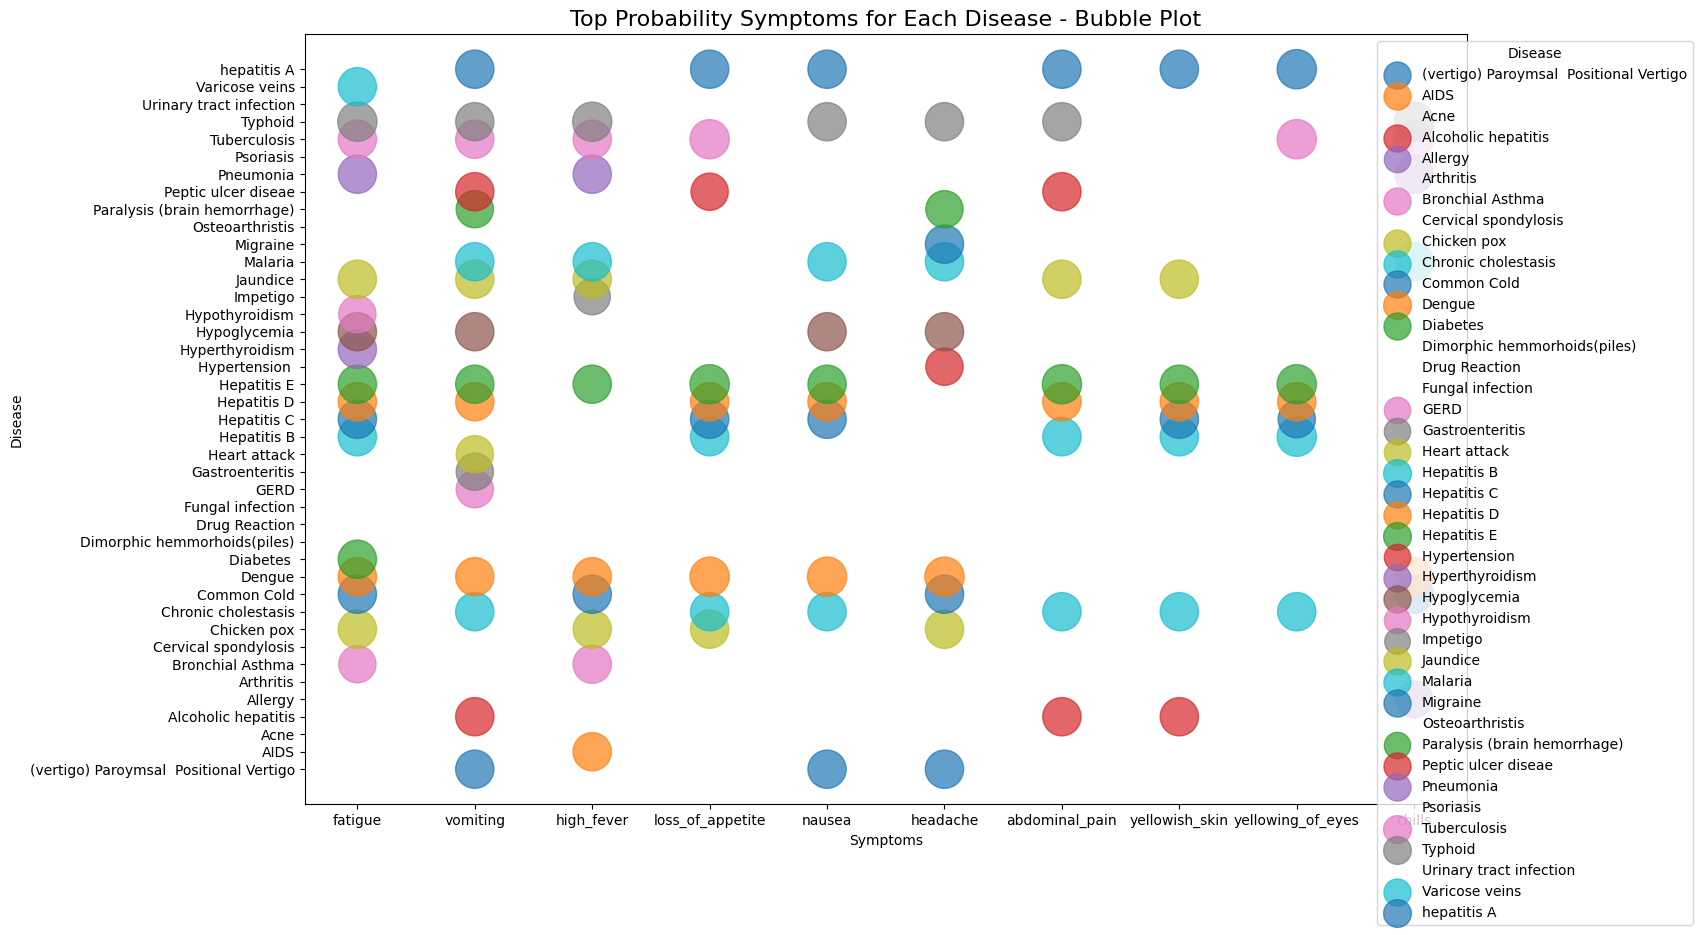

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom overall
overall_probabilities = symptoms.mean()

# Sort symptoms based on overall probability
sorted_symptoms = overall_probabilities.sort_values(ascending=False).index

# Select the top N symptoms for visualization
top_n_symptoms = 10  # You can adjust this based on your preference
selected_symptoms = sorted_symptoms[:top_n_symptoms]

# Create a bubble plot for each disease with selected symptoms
plt.figure(figsize=(15, 10))

for idx, (name, row) in enumerate(symptoms.groupby(disease).mean().iterrows()):
    plt.scatter(selected_symptoms, [name] * len(selected_symptoms),
                s=row[selected_symptoms] * 800, alpha=0.7, label=name)

# Add labels and legend
plt.title('Top Probability Symptoms for Each Disease - Bubble Plot', size=16)
plt.xlabel('Symptoms')
plt.ylabel('Disease')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Disease')

plt.show()


In [43]:
pip install plotly networkx


In [44]:
pip install plotly pandas


In [49]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Filter low probability symptoms for contrast
low_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.le(1 - threshold).any()]

# Combine high and low probability symptoms for the bubble chart
selected_symptoms = high_prob_symptoms.union(low_prob_symptoms)

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(symptom_probabilities[selected_symptoms].reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create a Bubble Chart
fig = px.scatter(melted_data, x='Symptom', y='prognosis', size='Probability',
                 color='prognosis', hover_name='Symptom', log_x=True,
                 labels={'prognosis': 'Disease'},
                 title='Bubble Chart of Symptom Probabilities for Each Disease',
                 size_max=30)

# Show the plot
fig.show()


In [50]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Filter low probability symptoms for contrast
low_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.le(1 - threshold).any()]

# Combine high and low probability symptoms for the 3D scatter plot
selected_symptoms = high_prob_symptoms.union(low_prob_symptoms)

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(symptom_probabilities[selected_symptoms].reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create a 3D Scatter Plot
fig = px.scatter_3d(melted_data, x='Symptom', y='prognosis', z='Probability',
                    color='Probability', size='Probability', size_max=30,
                    symbol='prognosis',
                    labels={'prognosis': 'Disease', 'Probability': 'Probability'},
                    title='Interactive 3D Scatter Plot of Symptom Probabilities for Each Disease')

# Show the plot
fig.show()


In [51]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Filter symptoms based on the threshold
high_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.gt(threshold).any()]

# Filter low probability symptoms for contrast
low_prob_symptoms = symptom_probabilities.columns[symptom_probabilities.le(1 - threshold).any()]

# Combine high and low probability symptoms for the 3D scatter plot
selected_symptoms = high_prob_symptoms.union(low_prob_symptoms)

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(symptom_probabilities[selected_symptoms].reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create a 3D Scatter Plot with adjusted size and font
fig = px.scatter_3d(melted_data, x='Symptom', y='prognosis', z='Probability',
                    color='Probability', size='Probability', size_max=40,
                    symbol='prognosis',
                    labels={'prognosis': 'Disease', 'Probability': 'Probability'},
                    title='Interactive 3D Scatter Plot of Symptom Probabilities for Each Disease',
                    text='Probability',
                    width=1000, height=800,
                    template='plotly_dark',  # You can change the template based on your preference
                    )

# Increase font size for better readability
fig.update_layout(font=dict(size=12))

# Show the plot
fig.show()


In [52]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Set a probability threshold
threshold = 0.9  # You can adjust this threshold based on your preference

# Calculate the average probability for each symptom
avg_probabilities = symptom_probabilities.mean()

# Select the top 10 symptoms with higher average probabilities
top_10_symptoms = avg_probabilities.nlargest(10).index

# Filter the DataFrame based on the top 10 symptoms
selected_symptoms = symptom_probabilities[top_10_symptoms]

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(selected_symptoms.reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create a 3D Scatter Plot with only the top 10 symptoms
fig = px.scatter_3d(melted_data, x='Symptom', y='prognosis', z='Probability',
                    color='Probability', size='Probability', size_max=40,
                    symbol='prognosis',
                    labels={'prognosis': 'Disease', 'Probability': 'Probability'},
                    title='Top 10 Symptoms with Higher Probabilities for Each Disease',
                    text='Probability',
                    width=1000, height=800,
                    template='plotly_dark',  # You can change the template based on your preference
                    )

# Increase font size for better readability
fig.update_layout(font=dict(size=12))

# Show the plot
fig.show()


In [54]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(symptom_probabilities.reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create an animated line chart
fig = px.line(melted_data, x='Symptom', y='Probability', color='prognosis',
              labels={'prognosis': 'Disease', 'Probability': 'Probability'},
              title='Animated Line Chart of Symptom Probabilities for Each Disease',
              animation_frame='prognosis',
              width=1000, height=600,
              template='plotly_dark'  # You can change the template based on your preference
              )

# Increase font size for better readability
fig.update_layout(font=dict(size=12))

# Show the plot
fig.show()



In [55]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(symptom_probabilities.reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create an animated line chart
fig = px.line(melted_data, x='Symptom', y='Probability', color='prognosis',
              labels={'prognosis': 'Disease', 'Probability': 'Probability'},
              title='Animated Line Chart of Symptom Probabilities',
              animation_frame='prognosis',
              width=1000, height=600,
              template='plotly_dark'  # You can change the template based on your preference
              )

# Increase font size for symptoms
fig.update_layout(font=dict(size=10))

# Omit disease names from the legend
fig.update_layout(legend_title_text='')

# Show the plot
fig.show()


In [56]:
import pandas as pd
import plotly.express as px

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv('/content/Training.csv')

# Separate symptoms and disease columns
symptoms = df.iloc[:, :-1]
disease = df.iloc[:, -1]

# Calculate the probability of each symptom for each disease
symptom_probabilities = symptoms.groupby(disease).mean()

# Melt the DataFrame for Plotly express compatibility
melted_data = pd.melt(symptom_probabilities.reset_index(), id_vars='prognosis', var_name='Symptom', value_name='Probability')

# Create an animated line chart
fig = px.line(melted_data, x='Symptom', y='Probability', color='prognosis',
              labels={'prognosis': 'Disease', 'Probability': 'Probability'},
              title='Animated Line Chart of Symptom Probabilities',
              animation_frame='prognosis',
              width=1000, height=600,
              template='plotly_dark',  # You can change the template based on your preference
              color_discrete_sequence=px.colors.qualitative.Set3  # Use a colorful palette
              )

# Increase font size for symptoms
fig.update_layout(font=dict(size=10))

# Omit disease names from the legend
fig.update_layout(legend_title_text='')

# Show the plot
fig.show()
